In [1]:
import OQtrl as oqt
import numpy as np

In [2]:
# 1. Create a manager object
experiment_manager = oqt.manager(boot=True)  # boot=False to prevent ADwin booting

In [3]:
# 2. Create new project
experiment_manager.create_project(name="Digital Output Examples")

In [4]:
experiment_manager["Digital Output Examples"]

Project | Name: Digital Output Examples, Number of Master Sequences: 0

In [5]:
# 3. Create a new master sequence
MOT_master = oqt.sequence.masterSequence(name="MOT", duration=200e-3)

In [6]:
MOT_master

 Master Sequence | Name: MOT, Duration: 0.2 
 slaves: []

In [7]:
# 4. Setting up the master sequence
# 4.1. Set digital output update period
MOT_master.settings.set_update_period(DO=10e-3)
# 4.2 Check the settings
MOT_master.settings.DO

masterSequenceSetting.DigOut(DO_FIFO_UPDATE_PERIOD=10000000, DO_FIFO_CH_PATTERN=None, DO_FIFO_WRITE_COUNT=None)

In [8]:
int(MOT_master.duration / MOT_master.settings.DO.DO_FIFO_UPDATE_PERIOD)

20

In [9]:
# 5. Create a new slave sequence for the master sequence
MOT_master.create_slave(types="DO", name="MOT_AOM_Driver", ch=0)
# Check total length of the slave sequence
MOT_master

 Master Sequence | Name: MOT, Duration: 0.2 
 slaves: ['MOT_AOM_Driver']

In [10]:
# 6. Pattern modifying
MOT_master["MOT_AOM_Driver"].pattern.update("1" * 10 + "0" * 10)

In [11]:
# 6.1 Verifying the pattern
MOT_master["MOT_AOM_Driver"].pattern

Pattern | Type: DO, Data: 11111111110000000000

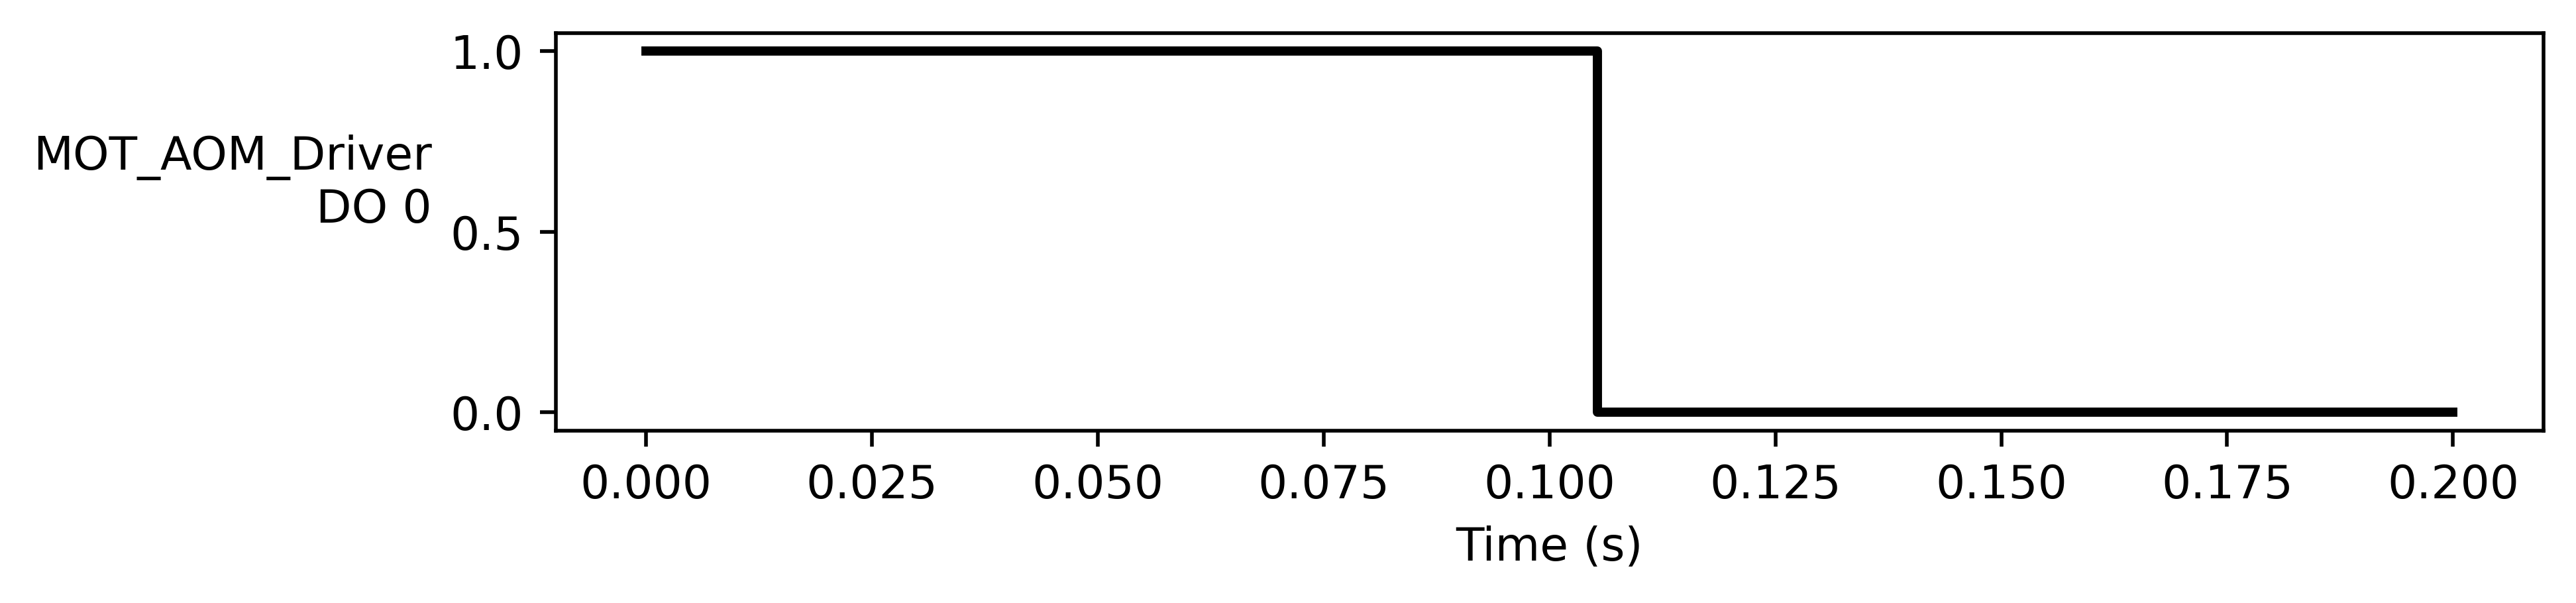

In [12]:
MOT_master.plot()

In [13]:
# 6.2 Let's make other sequences
MOT_master.create_slave(types="DO", name="MOT_MEMS_Switch", ch=1)
MOT_master["MOT_MEMS_Switch"].pattern.update("1" * 10 + "0" * 10)

MOT_master.create_slave(types="DO", name="AH_Coil_Driver", ch=2)
MOT_master["AH_Coil_Driver"].pattern.update("1" * 10 + "0" * 10)

MOT_master.create_slave(types="DO", name="Camera_trigger", ch=3)
MOT_master["Camera_trigger"].pattern.update("0" * 9 + "1" * 1 + ("0" * 1 + "1" * 1) * 5)

MOT_master.create_slave(types="DO", name="UV_LED", ch=4)
MOT_master["UV_LED"].pattern.update("1" * 10 + "0" * 10)

MOT_master.create_slave(types="DO", name="Arb-1", ch=5)
MOT_master["Arb-1"].pattern.update(("10") * 10)

MOT_master.create_slave(types="DO", name="Arb-2", ch=6)
MOT_master["Arb-2"].pattern.update("01" + "001" + "0001" + "00001" + "001000")

MOT_master.create_slave(types="DO", name="Arb-3", ch=7)
MOT_master["Arb-3"].pattern.update("01101010010110001010")

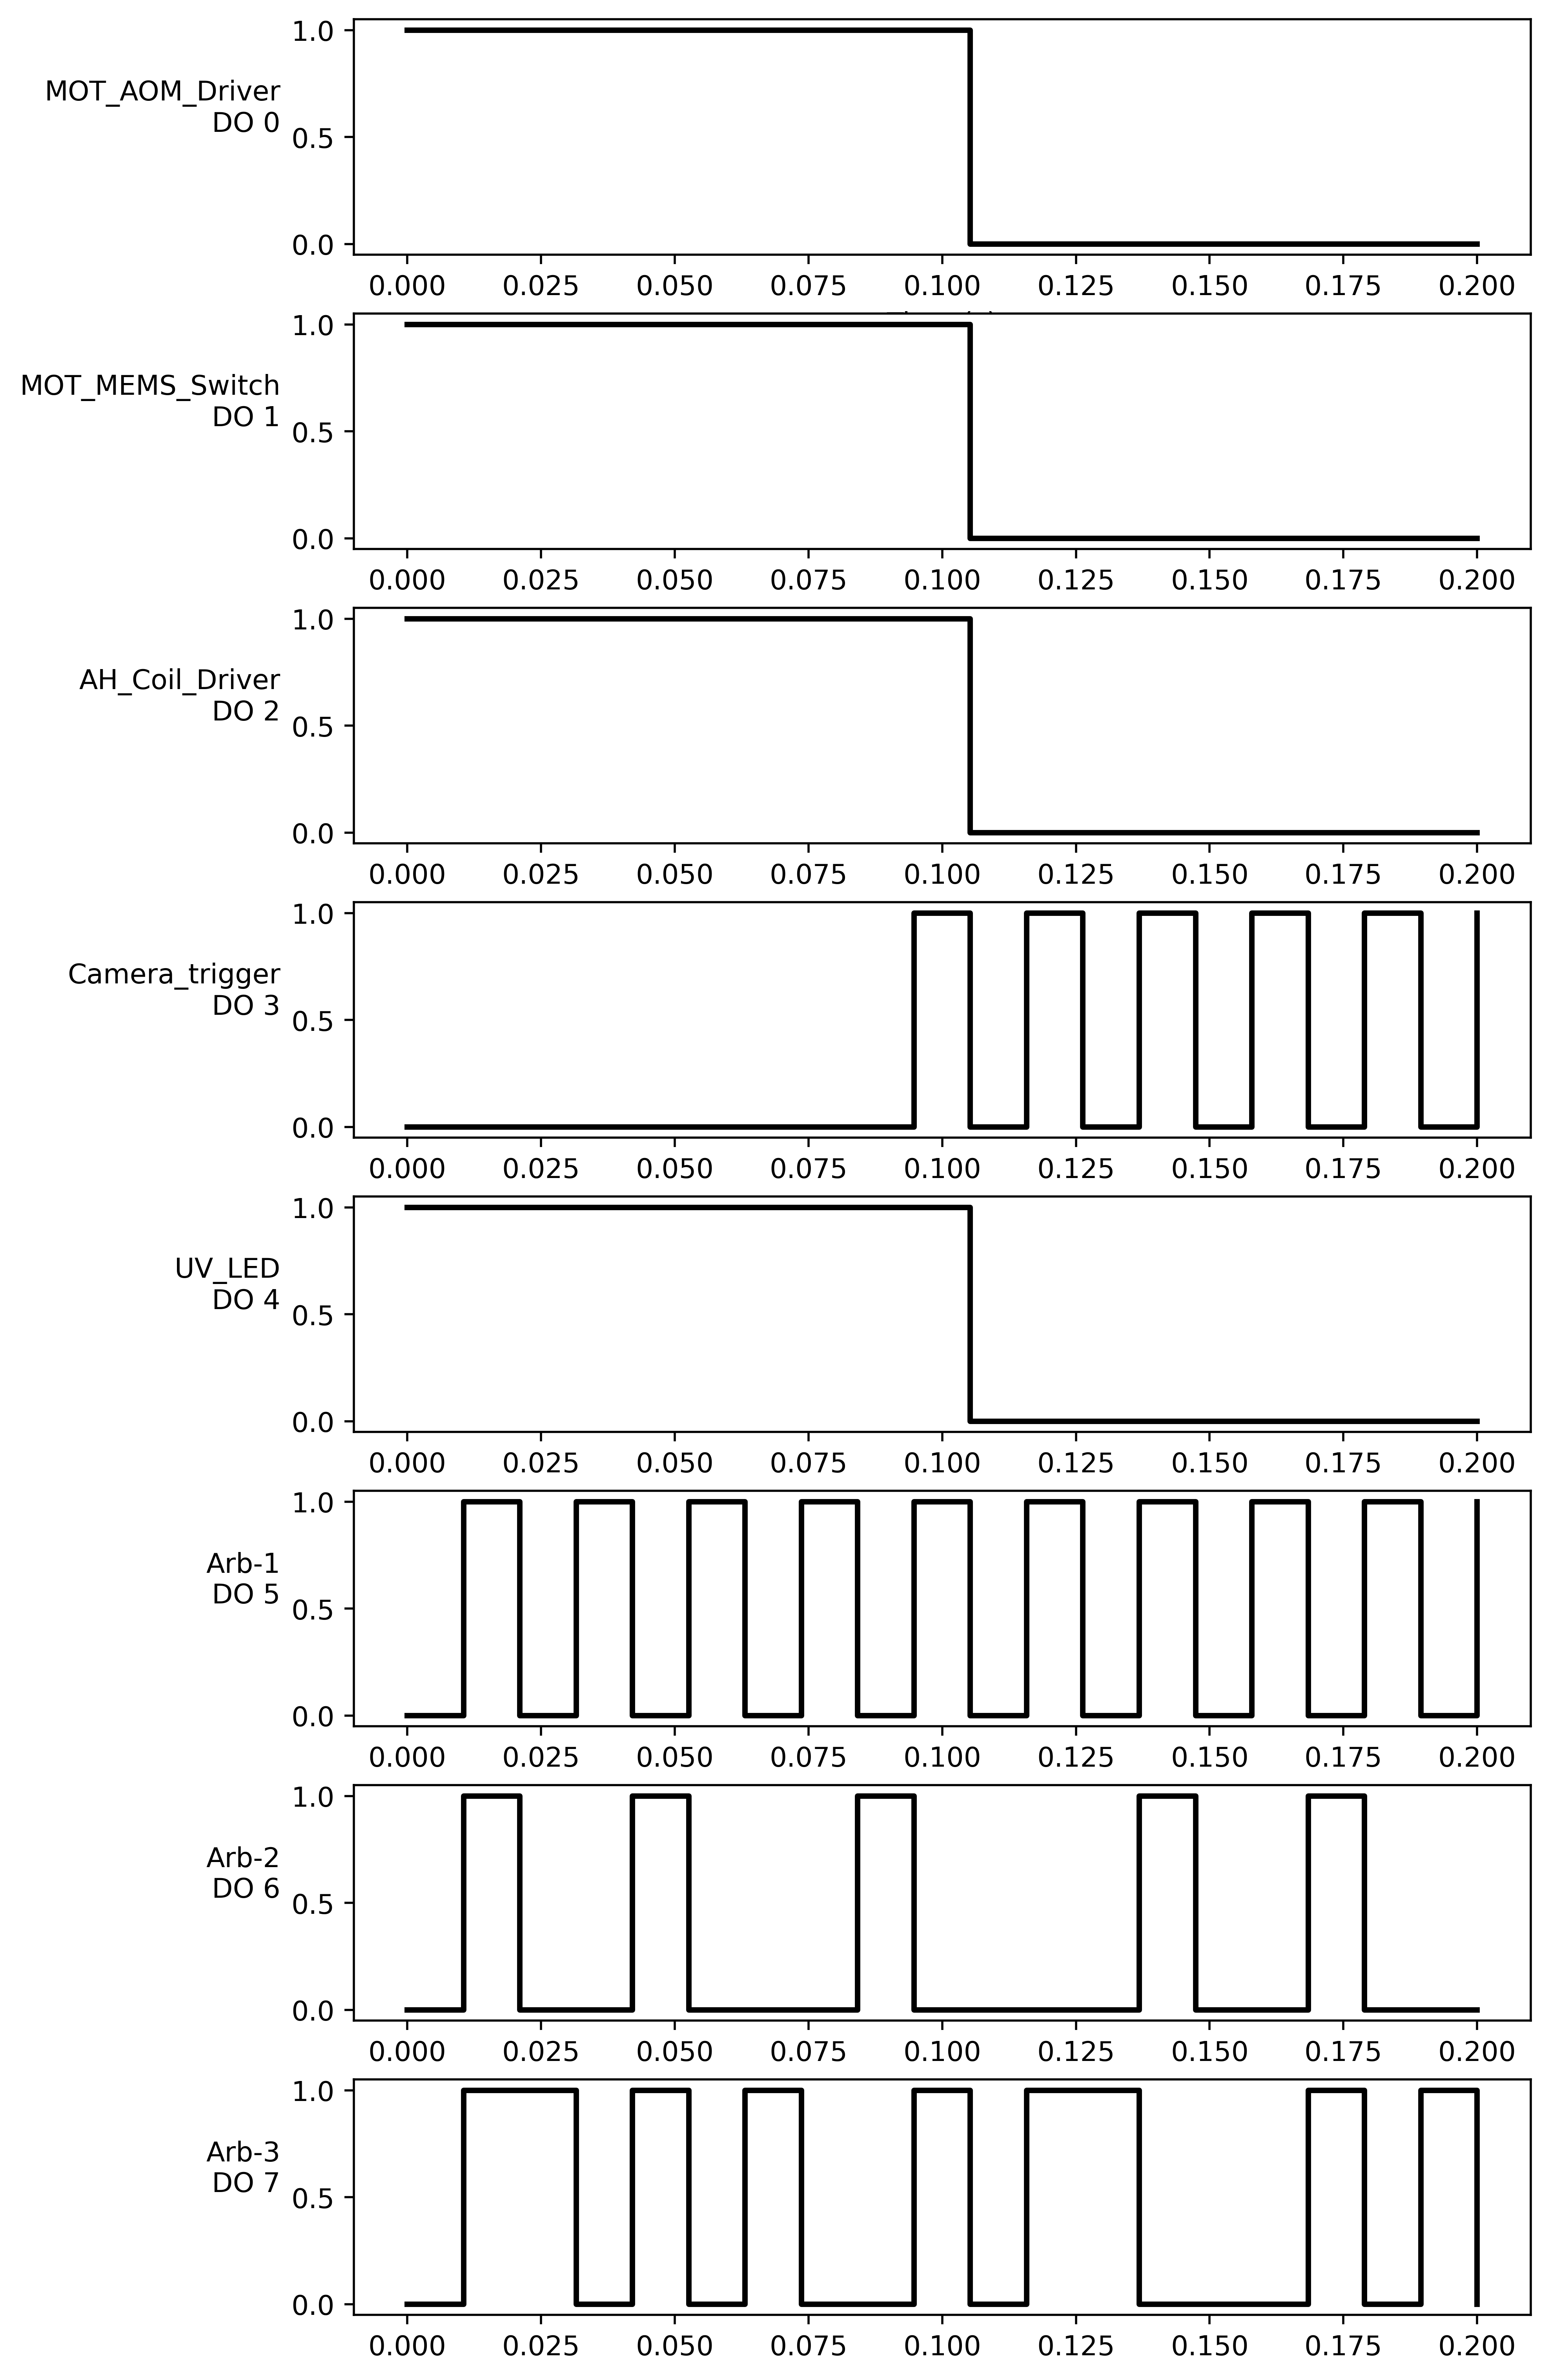

In [14]:
# 6.3 Let's Plot our Master sequence to see what we have done
MOT_master.plot()

In [15]:
experiment_manager["Digital Output Examples"].append(MOT_master)

In [16]:
experiment_manager["Digital Output Examples"][0]

{'DO': <OQtrl.c_long_Array_200 at 0x257000ff4d0>,
 'AO': None,
 'DI': None,
 'AI': None}

In [17]:
MOT_master['Camera_trigger'].channel

'3'

In [18]:
np.array(experiment_manager["Digital Output Examples"][0]['DO'])

array([      7, 1000000,       7, 1000000,       7, 1000000,       7,
       1000000,       7, 1000000,       7, 1000000,       7, 1000000,
             7, 1000000,       7, 1000000,       7, 1000000,       7,
       1000000,       7, 1000000,       7, 1000000,       7, 1000000,
             7, 1000000,       7, 1000000,       7, 1000000,       7,
       1000000,       7, 1000000,       7, 1000000,       7, 1000000,
             7, 1000000,       7, 1000000,       7, 1000000,       7,
       1000000,       7, 1000000,       7, 1000000,       7, 1000000,
             7, 1000000,       7, 1000000,       7, 1000000,       7,
       1000000,       7, 1000000,       7, 1000000,       7, 1000000,
             7, 1000000,       7, 1000000,       7, 1000000,       7,
       1000000,       7, 1000000,       7, 1000000,       7, 1000000,
             7, 1000000,       7, 1000000,       7, 1000000,       7,
       1000000,       7, 1000000,       7, 1000000,       7, 1000000,
             7, 1000

In [19]:
experiment_manager.start(project='Digital Output Examples')

In [22]:
experiment_manager.show_params_status()

{'DIO_CH_CONFIG': 3,
 'DO_FIFO_CH_PATTERN': 15,
 'DO_FIFO_WRITE_COUNT': 100,
 'DO_FIFO_WRITE_STARTING_INDEX': 1,
 'AI_AVG_MODE': 0,
 'AI_BURST_CHANNELS': 255,
 'AI_BURST_BUFFER_SIZE': 20000,
 'AI_BURST_CLOCK_RATE': 25,
 'AI_BURST_TRIGGER_MODE': 2,
 'AO_UPDATE_PERIOD': 3000}

In [49]:
experiment_manager.show_adwin_status()

1

In [20]:
experiment_manager.stop()

In [23]:
experiment_manager.show_adwin_status()

0